In [1]:
# pip install pyLDAvis

In [2]:
# pip install numpy==1.19.2

In [3]:
# pip install pandas==1.1.0

In [4]:
# pip install folium==0.2.1

In [5]:
# pip install imgaug==0.2.7

In [6]:
# pip install gensim

In [7]:
# pip install spacy

In [8]:
import pandas as pd
import numpy as np
import networkx as nx
import itertools
import collections
import spacy
from pprint import pprint

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis.gensim_models as gensimvis

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import subprocess
from gensim.models.wrappers import LdaMallet

# NLTK
from nltk import bigrams
from nltk.stem import PorterStemmer

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

c:\users\thanigav\appdata\local\programs\python\python39\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
c:\users\thanigav\appdata\local\programs\python\python39\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\users\thanigav\appdata\local\programs\python\python39\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


### Import Pre-Processed Data

In [9]:
df = pd.read_pickle('./pre-processed.pkl')

In [10]:
df.shape

(98727, 44)

In [11]:
# iterating the columns
for col in df.columns:
    print(col)

created_at
id
id_str
text
truncated
entities
metadata
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
retweeted_status
is_quote_status
retweet_count
favorite_count
favorited
retweeted
possibly_sensitive
lang
quoted_status_id
quoted_status_id_str
quoted_status
extended_entities
withheld_scope
withheld_in_countries
Hashtag
tidy_tweet
device
Location
text_tokenized
emoji_count
word_count
character_count
emoji_percent
tidy_tweet_tokens
tokens_no_stop
no_stop_joined


In [12]:
print(df.head(10))

                       created_at                   id               id_str  \
0  Mon Dec 05 14:14:43 +0000 2022  1599769240004972544  1599769240004972544   
1  Mon Dec 05 14:00:55 +0000 2022  1599765764113940483  1599765764113940483   
2  Mon Dec 05 14:00:04 +0000 2022  1599765552154775557  1599765552154775557   
3  Mon Dec 05 14:00:04 +0000 2022  1599765551378845697  1599765551378845697   
4  Mon Dec 05 14:00:04 +0000 2022  1599765550544130048  1599765550544130048   
5  Mon Dec 05 13:33:23 +0000 2022  1599758838215086080  1599758838215086080   
6  Mon Dec 05 13:21:03 +0000 2022  1599755732416700416  1599755732416700416   
7  Mon Dec 05 13:13:10 +0000 2022  1599753748133212160  1599753748133212160   
8  Mon Dec 05 13:11:17 +0000 2022  1599753276345679872  1599753276345679872   
9  Mon Dec 05 13:00:04 +0000 2022  1599750451251273729  1599750451251273729   

                                                text  truncated  \
0  RT @iot_automotive: 24h round-up. A collection...      False

### Bigrams


In [13]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in df['tokens_no_stop']]

# View bigrams for the first tweet
terms_bigram[0]

[('round', 'collection'), ('collection', 'tweets'), ('tweets', 'enjoy')]

In [14]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

In [15]:
# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

In [16]:
bigram_df = pd.DataFrame(bigram_counts.most_common(25), columns=['bigram', 'count'])

In [17]:
len(bigram_counts)


324307

In [18]:
print(bigram_df.head(25))

                   bigram  count
0    (electric, vehicles)   2460
1     (electric, vehicle)   2087
2        (electric, cars)    879
3         (green, energy)    681
4    (charging, stations)    616
5            (elon, musk)    487
6            (cenn, cenn)    461
7     (renewable, energy)    450
8         (self, driving)    437
9         (cenntro, cenn)    428
10        (clean, energy)    421
11        (cenn, cenntro)    410
12         (nasdaq, muln)    405
13         (google, play)    370
14  (download, fiskerati)    366
15     (fiskerati, store)    366
16        (store, google)    363
17      (climate, change)    359
18       (cenn, electric)    320
19      (first, electric)    314
20        (fisker, ocean)    302
21       (fast, charging)    291
22        (supply, chain)    287
23    (electric, scooter)    282
24      (fully, electric)    271


In [19]:
bigram_label = bigram_df['bigram'].tolist()
bigram_label

[('electric', 'vehicles'),
 ('electric', 'vehicle'),
 ('electric', 'cars'),
 ('green', 'energy'),
 ('charging', 'stations'),
 ('elon', 'musk'),
 ('cenn', 'cenn'),
 ('renewable', 'energy'),
 ('self', 'driving'),
 ('cenntro', 'cenn'),
 ('clean', 'energy'),
 ('cenn', 'cenntro'),
 ('nasdaq', 'muln'),
 ('google', 'play'),
 ('download', 'fiskerati'),
 ('fiskerati', 'store'),
 ('store', 'google'),
 ('climate', 'change'),
 ('cenn', 'electric'),
 ('first', 'electric'),
 ('fisker', 'ocean'),
 ('fast', 'charging'),
 ('supply', 'chain'),
 ('electric', 'scooter'),
 ('fully', 'electric')]

Number of Bigrams Identified 25


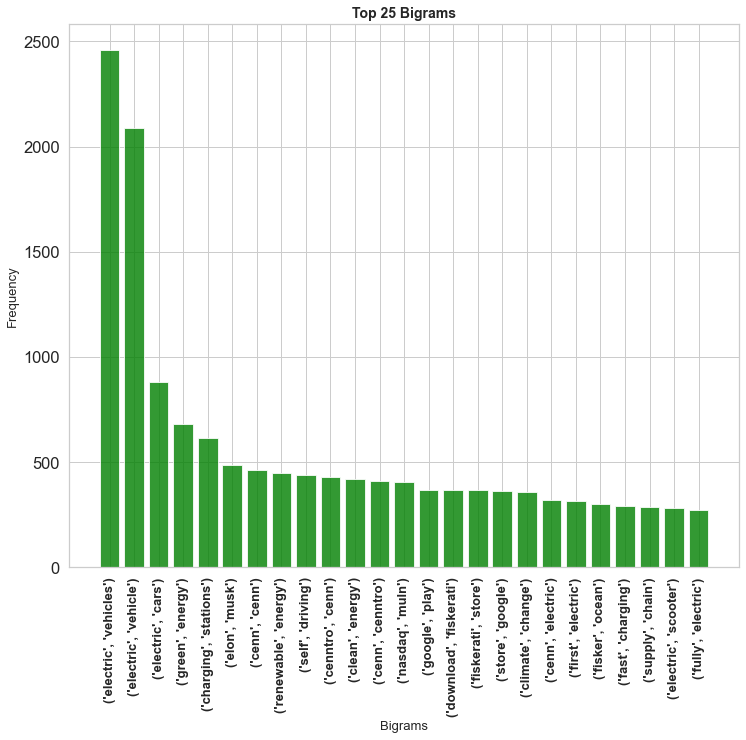

In [20]:
# bigram_label = ['elon - musk','electric - vehicle', 'electric - vehicles', 'self - driving','tesla - model',
#                 'charging - stations', 'happy - birthday','model - plaid','green - energy','currently- doge',
#                 'doge - rate','tsla - winnings','winnings - initial', 'initial - investment','realized - estimating',
#                 'estimating - average','rate - model','model - costs','electric - cars','renewable - energy',
#                 'average - price','long - range','good - project','strong - team', 'long - term']
bigram_freq = bigram_df['count'].head(25)
index = np.arange(len(bigram_freq))

print("Number of Bigrams Identified", len(bigram_df))
plt.figure(figsize=(12,10))
plt.bar(index, bigram_freq, alpha=0.8, color= 'green')
plt.xlabel('Bigrams', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, bigram_label, fontsize=13, rotation=90, fontweight="bold") 
plt.title('Top 25 Bigrams', fontsize=14, fontweight="bold")
plt.show()

## visualize bigrams

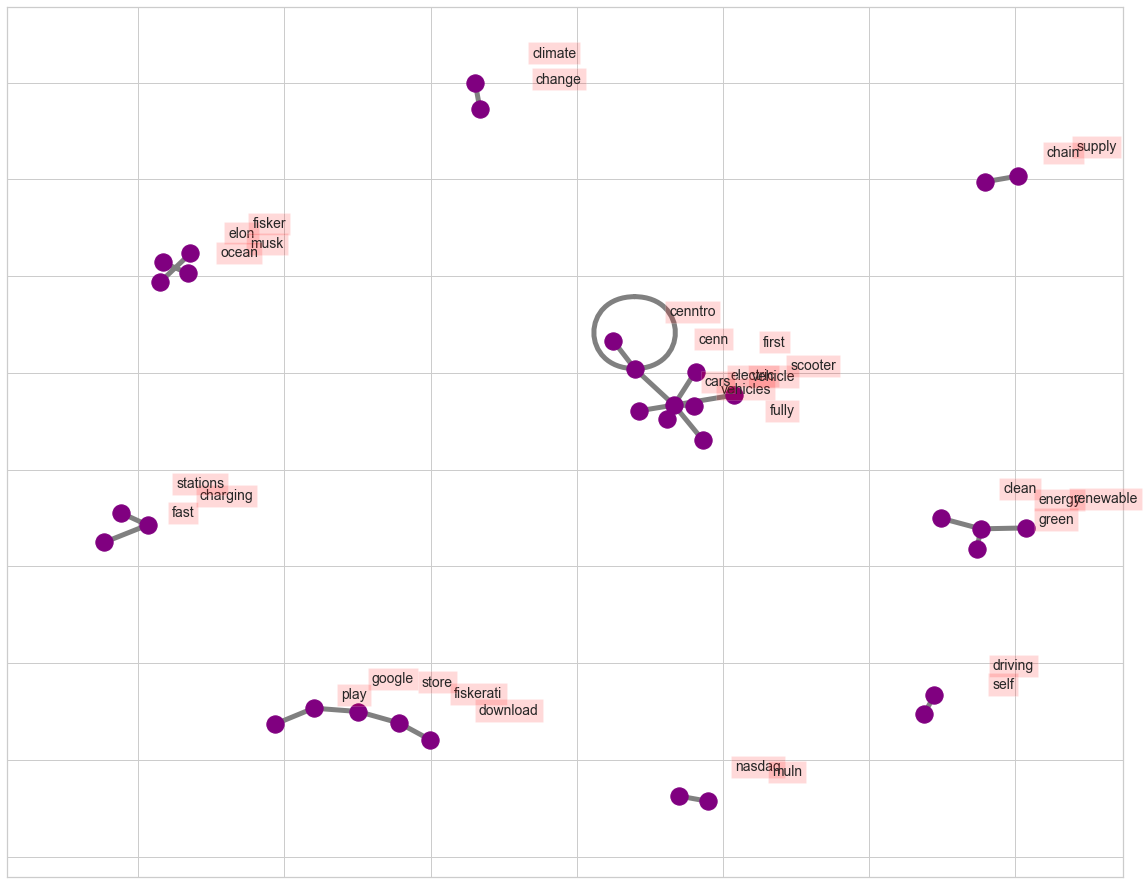

In [21]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 5))

fig, ax = plt.subplots(figsize=(20, 16))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=5,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.065
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.15),
            horizontalalignment='center', fontsize=14)
    
plt.show()

### Bigrams and Trigrams

In [22]:
data = df.no_stop_joined.values.tolist()

In [23]:
print(data[:1])

['round collection tweets enjoy']


### Tokenize

In [24]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [25]:
data_words = list(sent_to_words(data))

print(data_words[:1])

[['round', 'collection', 'tweets', 'enjoy']]


### Make Bigrams and Trigrams

In [26]:
# Build the bigram and trigram model
bigram = gensim.models.Phrases(data_words, min_count=10, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [27]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[5]]])

['fact_fiction', 'latency']


In [28]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [29]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

### lemmatization

In [30]:
def lemmatization(tweets, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    tweets_out = []
    for sent in tweets:
        doc = nlp(" ".join(sent)) 
        tweets_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return tweets_out

In [31]:
import sys
!{sys.executable} -m spacy download en

You should consider upgrading via the 'c:\users\thanigav\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full


In [32]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


c:\users\thanigav\appdata\local\programs\python\python39\lib\site-packages\spacy\language.py:1895: UserWarning: [W123] Argument disable with value ['parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


In [33]:
# Do lemmatization keeping only noun, adj, vb, adv
df['lemmatized'] = pd.Series(lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']))

In [34]:
print(df)

                           created_at                   id  \
0      Mon Dec 05 14:14:43 +0000 2022  1599769240004972544   
1      Mon Dec 05 14:00:55 +0000 2022  1599765764113940483   
2      Mon Dec 05 14:00:04 +0000 2022  1599765552154775557   
3      Mon Dec 05 14:00:04 +0000 2022  1599765551378845697   
4      Mon Dec 05 14:00:04 +0000 2022  1599765550544130048   
...                               ...                  ...   
98722  Fri Oct 21 17:33:17 +0000 2022  1583511757301067776   
98723  Fri Oct 21 16:01:05 +0000 2022  1583488552117055489   
98724  Fri Oct 21 16:01:00 +0000 2022  1583488530566680576   
98725  Fri Oct 21 15:38:21 +0000 2022  1583482832835731456   
98726  Fri Oct 21 15:07:02 +0000 2022  1583474949343580160   

                    id_str                                               text  \
0      1599769240004972544  RT @iot_automotive: 24h round-up. A collection...   
1      1599765764113940483  Meet Powderworld: A Lightweight Simulation Env...   
2      15997

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98727 entries, 0 to 98726
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 98727 non-null  object 
 1   id                         98727 non-null  int64  
 2   id_str                     98727 non-null  int64  
 3   text                       98727 non-null  object 
 4   truncated                  98727 non-null  bool   
 5   entities                   98727 non-null  object 
 6   metadata                   98727 non-null  object 
 7   source                     98727 non-null  object 
 8   in_reply_to_status_id      11204 non-null  float64
 9   in_reply_to_status_id_str  11204 non-null  float64
 10  in_reply_to_user_id        12568 non-null  float64
 11  in_reply_to_user_id_str    12568 non-null  float64
 12  in_reply_to_screen_name    12568 non-null  object 
 13  user                       98727 non-null  obj

### Stemming

In [36]:
stemmer = PorterStemmer()

In [37]:
df['stemmed'] = df['lemmatized'].apply(lambda x : [stemmer.stem(y) for y in x])

In [38]:
print(df)

                           created_at                   id  \
0      Mon Dec 05 14:14:43 +0000 2022  1599769240004972544   
1      Mon Dec 05 14:00:55 +0000 2022  1599765764113940483   
2      Mon Dec 05 14:00:04 +0000 2022  1599765552154775557   
3      Mon Dec 05 14:00:04 +0000 2022  1599765551378845697   
4      Mon Dec 05 14:00:04 +0000 2022  1599765550544130048   
...                               ...                  ...   
98722  Fri Oct 21 17:33:17 +0000 2022  1583511757301067776   
98723  Fri Oct 21 16:01:05 +0000 2022  1583488552117055489   
98724  Fri Oct 21 16:01:00 +0000 2022  1583488530566680576   
98725  Fri Oct 21 15:38:21 +0000 2022  1583482832835731456   
98726  Fri Oct 21 15:07:02 +0000 2022  1583474949343580160   

                    id_str                                               text  \
0      1599769240004972544  RT @iot_automotive: 24h round-up. A collection...   
1      1599765764113940483  Meet Powderworld: A Lightweight Simulation Env...   
2      15997



### Create Dictionary and Corpus

In [39]:
# Create Dictionary
id2word_stemmed = corpora.Dictionary(df['stemmed'])

In [40]:
# Create Dictionary
id2word_lemma = corpora.Dictionary(df['tokens_no_stop'])

In [41]:
# Create Dictionary
id2word_tidy = corpora.Dictionary(df['tidy_tweet_tokens'])

In [42]:
print(id2word_stemmed)

Dictionary(20724 unique tokens: ['round_collect', 'environ', 'gener', 'meet', 'simul']...)


In [43]:
print(id2word_lemma)

Dictionary(36962 unique tokens: ['collection', 'enjoy', 'round', 'tweets', 'environment']...)


In [44]:
print(id2word_tidy)

Dictionary(37047 unique tokens: ['collection', 'enjoy', 'round', 'tweets', 'environment']...)


In [45]:
# Create Corpus
tweets_stemmed = df['stemmed']

In [46]:
df['stemmed'][1]

['meet', 'simul', 'environ', 'understand', 'gener']

In [47]:
df['text'][1]

'Meet Powderworld: A Lightweight Simulation Environment For Understanding AI Generalization  https://t.co/dO8yTvZndM… https://t.co/Nz8GnOtzqv'

In [48]:
tweets_stemmed

0                                          [round_collect]
1                [meet, simul, environ, understand, gener]
2        [research, paper, investig, fix, roadsid, improv]
3        [research, paper, investig, fix, roadsid, impr...
4        [american, driver, like, benefit, self_driv, t...
                               ...                        
98722       [finalist, good, electr, boat, support, proud]
98723       [work, close, increas, access, reliabl, charg]
98724    [strategi, help, meet, ambiti, goal, state, ro...
98725                                 [first, ever, drill]
98726                    [want, know, solut, applic, join]
Name: stemmed, Length: 98727, dtype: object

In [49]:
# Term Document Frequency
corpus_stemmed = [id2word_stemmed.doc2bow(tweet) for tweet in tweets_stemmed]

In [50]:
print(len(corpus_stemmed))

98727


In [51]:
print(corpus_stemmed[36307])

[(216, 1), (303, 1), (742, 1), (1275, 1), (1586, 1), (11191, 1), (11192, 1)]


In [52]:
# Human readable format of corpus (term-frequency)
[[(id2word_stemmed[id], freq) for id, freq in cp] for cp in corpus_stemmed[:3]]

[[('round_collect', 1)],
 [('environ', 1), ('gener', 1), ('meet', 1), ('simul', 1), ('understand', 1)],
 [('fix', 1),
  ('improv', 1),
  ('investig', 1),
  ('paper', 1),
  ('research', 1),
  ('roadsid', 1)]]

### Build the LDA Model

In [53]:
# Build LDA model
lda_model_stemmed = gensim.models.ldamodel.LdaModel(corpus=corpus_stemmed,
                                           id2word=id2word_stemmed,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=15,
                                           alpha='auto',
                                           per_word_topics=True)

In [54]:
pprint(lda_model_stemmed.print_topics())
doc_lda_stemmed = lda_model_stemmed[corpus_stemmed]

[(0,
  '0.210*"energi" + 0.047*"renew" + 0.038*"invest" + 0.029*"need" + '
  '0.023*"global" + 0.023*"take" + 0.022*"technolog" + 0.021*"sustain" + '
  '0.016*"save" + 0.016*"meet"'),
 (1,
  '0.056*"electr" + 0.052*"clean" + 0.045*"make" + 0.033*"transit" + '
  '0.024*"vehicl" + 0.023*"develop" + 0.023*"good" + 0.019*"look" + '
  '0.019*"climat" + 0.018*"join"'),
 (2,
  '0.135*"solar" + 0.108*"power" + 0.032*"year" + 0.030*"hydrogen" + '
  '0.025*"free" + 0.024*"great" + 0.023*"emiss" + 0.020*"truck" + '
  '0.019*"instal" + 0.019*"week"'),
 (3,
  '0.053*"busi" + 0.047*"product" + 0.046*"well" + 0.045*"know" + '
  '0.037*"start" + 0.034*"plan" + 0.032*"say" + 0.030*"port" + 0.020*"check" + '
  '0.018*"nuclear"'),
 (4,
  '0.085*"chang" + 0.050*"want" + 0.047*"visit" + 0.041*"govern" + '
  '0.039*"hands_think" + 0.035*"late" + 0.027*"report" + 0.025*"research" + '
  '0.023*"bu" + 0.021*"focu"'),
 (5,
  '0.056*"news" + 0.051*"time" + 0.041*"batteri" + 0.037*"industri" + '
  '0.033*"announc

### Model Perplexity and Coherence Score

In [55]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_stemmed.log_perplexity(corpus_stemmed))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_stemmed = CoherenceModel(model=lda_model_stemmed, texts=df['stemmed'], dictionary=id2word_stemmed, coherence='c_v')
coherence_lda_stemmed = coherence_model_lda_stemmed.get_coherence()
print('\nCoherence Score: ', coherence_lda_stemmed)


Perplexity:  -8.97442949714506

Coherence Score:  0.21964532684283006


In [56]:
lda_model_stemmed.save('gensim_model.gensim')

### Mallet Wrapper

In [57]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\thanigav\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [58]:
import wget
url = 'http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip'
myfile = wget.download(url)

100% [........................................................................] 16184794 / 16184794

In [59]:
# !wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

In [60]:
# !unzip mallet-2.0.8.zip

In [61]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [62]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\thanigav\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [63]:
num_topics = 8
mallet_path = r'C:/mallet/mallet-2.0.8/bin/mallet.bat'
import os
os.environ['MALLET_HOME'] = 'C:/mallet/mallet-2.0.8/'
ldamallet_stemmed = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_stemmed, num_topics=num_topics, id2word=id2word_stemmed)

In [64]:
# Show Topics
pprint(ldamallet_stemmed.show_topics(formatted=False))

[(0,
  [('futur', 0.030678163863513474),
   ('tesla', 0.028529554056746065),
   ('world', 0.028486866444691086),
   ('good', 0.027490822163408177),
   ('build', 0.021927203392242238),
   ('model', 0.021543014883747404),
   ('invest', 0.020262386522097955),
   ('design', 0.014229204018327215),
   ('chang', 0.013745411081704089),
   ('full', 0.012920117248641111)]),
 (1,
  [('batteri', 0.06603617741802263),
   ('market', 0.0345943118306214),
   ('sale', 0.028055394950579553),
   ('compani', 0.024641392032157705),
   ('develop', 0.020401420665730568),
   ('high', 0.020057267145728367),
   ('manufactur', 0.019437790809724402),
   ('lithium', 0.019203766416122904),
   ('technolog', 0.018749483769719997),
   ('demand', 0.017799620054513916)]),
 (2,
  [('power', 0.05151631587186384),
   ('solar', 0.032446740383383854),
   ('news', 0.031464799555991976),
   ('make', 0.030824403364214662),
   ('announc', 0.02323926624827449),
   ('system', 0.015725284264754016),
   ('larg', 0.013633323371614794

In [65]:
# Compute Coherence Score
coherence_model_ldamallet_stemmed = CoherenceModel(model=ldamallet_stemmed, texts=df['stemmed'], dictionary=id2word_stemmed, coherence='c_v')
coherence_ldamallet_stemmed = coherence_model_ldamallet_stemmed.get_coherence()
print('\nCoherence Score (Stemmed): ', coherence_ldamallet_stemmed)


Coherence Score (Stemmed):  0.2724458672130621


### Visualize with pyLDAvis

In [66]:
# Visualize the topics
pyLDAvis.enable_notebook()


In [67]:
visualisation = gensimvis.prepare(lda_model_stemmed,corpus_stemmed,id2word_stemmed)

c:\users\thanigav\appdata\local\programs\python\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [68]:
visualisation

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.102730 -0.110243       1        1  15.543152
0     -0.408205 -0.186581       2        1  13.892441
7      0.126178 -0.093578       3        1  11.462628
2     -0.055542  0.123205       4        1  11.322904
6     -0.095990  0.385961       5        1  10.081341
5      0.091109 -0.051883       6        1   9.353261
8      0.061074 -0.024347       7        1   8.430749
3      0.072889 -0.032369       8        1   7.886148
9      0.048400 -0.001914       9        1   7.212400
4      0.057357 -0.008251      10        1   4.814974, topic_info=              Term          Freq         Total Category  logprob  loglift
1350        energi  17967.000000  17967.000000  Default  30.0000  30.0000
2018         solar   9418.000000   9418.000000  Default  29.0000  29.0000
2024         green   8237.000000   8237.000000  Default  28.0000  28.0000
262          power   7524.000000   7524.000000  Default  27.0000  27.0000
23           futur   4790.000000   4790.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
1614         night    266.274322    267.205953  Topic10  -4.7139   3.0299
955           miss    264.587517    265.519126  Topic10  -4.7202   3.0299
757       introduc    250.955032    251.886703  Topic10  -4.7731   3.0297
1109      competit    248.392601    249.324218  Topic10  -4.7834   3.0297
20101  hands_think   1166.174471   1527.982371  Topic10  -3.2369   2.7632

[331 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1235      7  0.999042     acceler
737       9  0.998355      achiev
1223      4  0.997930      action
213       9  0.997662       adopt
767       7  0.999595      advanc
...     ...       ...         ...
150       7  0.999606        work
66        5  0.999846       world
1753      6  0.997904       worth
399       4  0.999681        year
4666      6  0.997839  zero_emiss

[308 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 8, 3, 7, 6, 9, 4, 10, 5])

In [69]:
pyLDAvis.save_html(visualisation, 'lda.html')

### find optimal number of topics

In [70]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_stemmed, num_topics=num_topics, id2word=id2word_stemmed)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [71]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word_stemmed, corpus=corpus_stemmed, texts=df['stemmed'], start=2, limit=26, step=3)

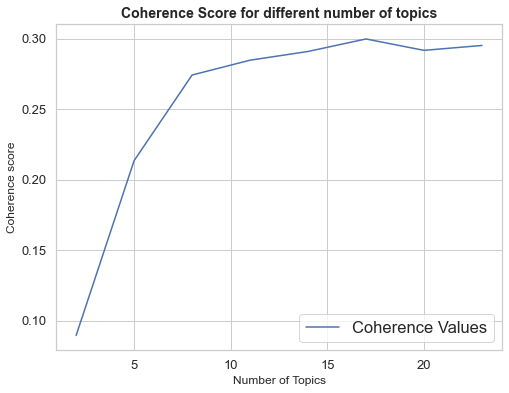

In [72]:
# Show graph
limit=26; start=2; step=3;
x = range(start, limit, step)
plt.figure(figsize=(8,6))
plt.plot(x, coherence_values)
plt.title('Coherence Score for different number of topics', fontsize=14, fontweight="bold")
plt.xlabel("Number of Topics", fontsize=12)
plt.ylabel("Coherence score", fontsize=12)
plt.tick_params(axis='both', labelsize=13)
plt.legend(["Coherence Values"], loc='lower right')
plt.show()

In [73]:
# Print the coherence scores for different number of topics
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.0897
Num Topics = 5  has Coherence Value of 0.2135
Num Topics = 8  has Coherence Value of 0.2742
Num Topics = 11  has Coherence Value of 0.2847
Num Topics = 14  has Coherence Value of 0.2909
Num Topics = 17  has Coherence Value of 0.2998
Num Topics = 20  has Coherence Value of 0.2917
Num Topics = 23  has Coherence Value of 0.2951


### Optimal Model

In [74]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.188*"electr" + 0.113*"vehicl" + 0.044*"car" + 0.035*"drive" + '
  '0.018*"rang" + 0.018*"truck" + 0.016*"test" + 0.016*"road" + 0.014*"design" '
  '+ 0.012*"long"'),
 (1,
  '0.060*"make" + 0.030*"futur" + 0.028*"world" + 0.024*"today" + 0.017*"join" '
  '+ 0.017*"work" + 0.016*"part" + 0.016*"learn" + 0.013*"chang" + '
  '0.013*"govern"'),
 (2,
  '0.067*"batteri" + 0.057*"energi" + 0.026*"green" + 0.022*"invest" + '
  '0.021*"develop" + 0.020*"technolog" + 0.020*"manufactur" + 0.017*"build" + '
  '0.017*"product" + 0.016*"mobil"'),
 (3,
  '0.032*"news" + 0.023*"announc" + 0.019*"compani" + 0.017*"sell" + '
  '0.016*"busi" + 0.014*"plan" + 0.014*"video" + 0.013*"larg" + 0.013*"free" + '
  '0.012*"partner"'),
 (4,
  '0.094*"charg" + 0.050*"power" + 0.032*"solar" + 0.020*"station" + '
  '0.018*"charger" + 0.017*"fast" + 0.016*"solut" + 0.015*"system" + '
  '0.015*"offer" + 0.014*"gener"'),
 (5,
  '0.035*"market" + 0.029*"sale" + 0.022*"industri" + 0.020*"lithium" + '
  '0.020*"p

### Dominant Topic

In [75]:
def format_topics_sentences(ldamodel=ldamallet_stemmed, corpus=corpus_stemmed, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each documen
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus_stemmed, texts=df['stemmed'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(15)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.1422,"time, good, great, week, peopl, team, mani, gi...",[round_collect]
1,1,6.0,0.1500,"time, good, great, week, peopl, team, mani, gi...","[meet, simul, environ, understand, gener]"
2,2,2.0,0.1513,"batteri, energi, green, invest, develop, techn...","[research, paper, investig, fix, roadsid, improv]"
3,3,4.0,0.1584,"charg, power, solar, station, charger, fast, s...","[research, paper, investig, fix, roadsid, impr..."
4,4,4.0,0.1506,"charg, power, solar, station, charger, fast, s...","[american, driver, like, benefit, self_driv, t..."
5,5,5.0,0.1334,"market, sale, industri, lithium, price, read, ...",[latenc]
6,6,2.0,0.1513,"batteri, energi, green, invest, develop, techn...","[research, paper, investig, fix, roadsid, improv]"
7,7,4.0,0.1603,"charg, power, solar, station, charger, fast, s...","[research, paper, investig, fix, roadsid, impr..."
8,8,4.0,0.1525,"charg, power, solar, station, charger, fast, s...","[american, driver, like, benefit, self_driv, t..."
9,9,1.0,0.1907,"make, futur, world, today, join, work, part, l...","[futur, transport, center, make, urban, mobil,..."


In [76]:
df_dominant_topic[df_dominant_topic.Dominant_Topic == 7.0]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
29,29,7.0,0.1623,"tesla, year, launch, model, cost, show, produc...","[research, improv, train, infer, perform, deep..."
37,37,7.0,0.1528,"tesla, year, launch, model, cost, show, produc...","[build, real, self_driv, scratch]"
45,45,7.0,0.1500,"tesla, year, launch, model, cost, show, produc...","[ambiq, optim, featur, develop, neuralspot]"
49,49,7.0,0.1473,"tesla, year, launch, model, cost, show, produc...","[synsens, launch, speck, kit, audio, work]"
70,70,7.0,0.1368,"tesla, year, launch, model, cost, show, produc...","[look, speed, adopt, edg]"
...,...,...,...,...,...
98656,98656,7.0,0.1713,"tesla, year, launch, model, cost, show, produc...","[final, clap, season, missionh]"
98667,98667,7.0,0.1447,"tesla, year, launch, model, cost, show, produc...","[tomorrow, visit, vehicl, display, trade, show..."
98668,98668,7.0,0.1447,"tesla, year, launch, model, cost, show, produc...","[tomorrow, visit, vehicl, display, trade, show..."
98714,98714,7.0,0.1500,"tesla, year, launch, model, cost, show, produc...","[julian, show, first, practic, aviat, powertrain]"


### Total Topic Distrubution across documents 

In [77]:
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution = topic_contribution.rename_axis('Dominant_Topic').reset_index(name='percentage')

topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates()
topic_num_keywords.index = range(len(topic_num_keywords))

df_dominant_topics = pd.merge(topic_contribution, topic_num_keywords, how='inner', on='Dominant_Topic')
df_dominant_topics

,Dominant_Topic,percentage,Topic_Keywords
0,0.0,0.1732,"electr, vehicl, car, drive, rang, truck, test,..."
1,1.0,0.1441,"make, futur, world, today, join, work, part, l..."
2,2.0,0.1284,"batteri, energi, green, invest, develop, techn..."
3,4.0,0.1195,"charg, power, solar, station, charger, fast, s..."
4,6.0,0.1150,"time, good, great, week, peopl, team, mani, gi..."
5,3.0,0.1108,"news, announc, compani, sell, busi, plan, vide..."
6,5.0,0.1071,"market, sale, industri, lithium, price, read, ..."
7,7.0,0.1018,"tesla, year, launch, model, cost, show, produc..."


In [78]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2639,"electr, vehicl, car, drive, rang, truck, test,...","[meat, slicer, anescra, electr, deli, food, sl..."
1,1.0,0.2542,"make, futur, world, today, join, work, part, l...","[tini, major, british, voter, fool, factual, p..."
2,2.0,0.2708,"batteri, energi, green, invest, develop, techn...","[know, renew, green, energi, clean, energi, so..."
3,3.0,0.2438,"news, announc, compani, sell, busi, plan, vide...","[sadden, sudden, demis, visionari, busi, leade..."
4,4.0,0.2782,"charg, power, solar, station, charger, fast, s...","[solarski, roof, turn, sunshin, mile, photovol..."
5,5.0,0.2782,"market, sale, industri, lithium, price, read, ...","[lithium, mine, market, grow, rapidli, go, tre..."
6,6.0,0.2603,"time, good, great, week, peopl, team, mani, gi...","[well, airpod, airpod, earli, black_friday, de..."
7,7.0,0.2664,"tesla, year, launch, model, cost, show, produc...","[speed, dodgi, danc, club, instant, mental, ar..."


In [79]:
print(sent_topics_sorteddf_mallet['Text'][6])

['well', 'airpod', 'airpod', 'earli', 'black_friday', 'deal', 'gift', 'card', 'free', 'deal', 'hunt', 'earli', 'airpod']


In [80]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf_mallet[['Topic_Num', 'Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts.sort_index(), topic_contribution.sort_index()], axis=1)

# Change Column names
df_dominant_topics.columns = ['Topic', 'Topic_Keywords', 'Num_Tweets', 'Perc_Tweets']

# Show
df_dominant_topics['Perc_Tweets'] = df_dominant_topics['Perc_Tweets'] * 100

In [81]:
df_dominant_topics['Text'] = sent_topics_sorteddf_mallet['Text']

In [82]:
df_dominant_topics

,Topic,Topic_Keywords,Num_Tweets,Perc_Tweets,Text
0.0,0.0,"electr, vehicl, car, drive, rang, truck, test,...",17104,17.32,"[meat, slicer, anescra, electr, deli, food, sl..."
1.0,1.0,"make, futur, world, today, join, work, part, l...",14229,14.41,"[tini, major, british, voter, fool, factual, p..."
2.0,2.0,"batteri, energi, green, invest, develop, techn...",12675,12.84,"[know, renew, green, energi, clean, energi, so..."
3.0,3.0,"news, announc, compani, sell, busi, plan, vide...",10942,11.08,"[sadden, sudden, demis, visionari, busi, leade..."
4.0,4.0,"charg, power, solar, station, charger, fast, s...",11801,11.95,"[solarski, roof, turn, sunshin, mile, photovol..."
5.0,5.0,"market, sale, industri, lithium, price, read, ...",10572,10.71,"[lithium, mine, market, grow, rapidli, go, tre..."
6.0,6.0,"time, good, great, week, peopl, team, mani, gi...",11355,11.50,"[well, airpod, airpod, earli, black_friday, de..."
7.0,7.0,"tesla, year, launch, model, cost, show, produc...",10049,10.18,"[speed, dodgi, danc, club, instant, mental, ar..."


Total Tweets 98727


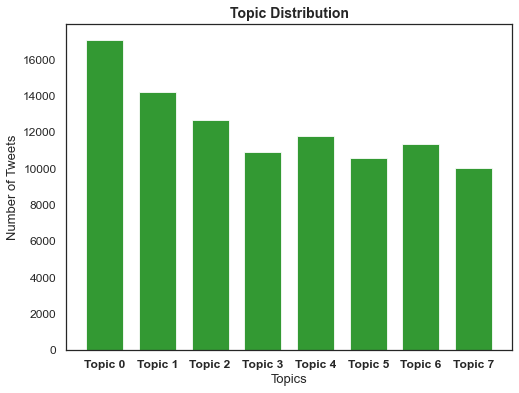

In [83]:
sns.set_style("white")
label = ['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7']
freq = df_dominant_topics['Num_Tweets']
index = np.arange(len(freq))

print("Total Tweets", df_dominant_topics['Num_Tweets'].sum())
plt.figure(figsize=(8,6), facecolor='white')
plt.bar(index, freq, alpha=0.8, color= 'green', width=0.7)
plt.xlabel('Topics', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=13)
plt.xticks(index, label, fontsize=11, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Topic Distribution', fontsize=14, fontweight="bold")
plt.show()

### Save Results

In [84]:
df_dominant_topics.to_pickle('./topic_modelling_gensim_results.pkl')